## Imports

In [1]:
# To embed plots in the notebooks
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np # numpy library
import scipy.io
from scipy.spatial import distance # load distance function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

# load dataset

In [2]:
mat = scipy.io.loadmat('Silhouettes.mat')
Fem = mat['Fem'].ravel() - 1 # Get rid of outer dim, -1 due to stupid matlab indexing
Male = mat['Male'].ravel() - 1
Xa = mat['Xa']

## 2 Perform model selection for KNN classification (for the silhouette data):
> (a) Load the dataset and plot the silhouettes.


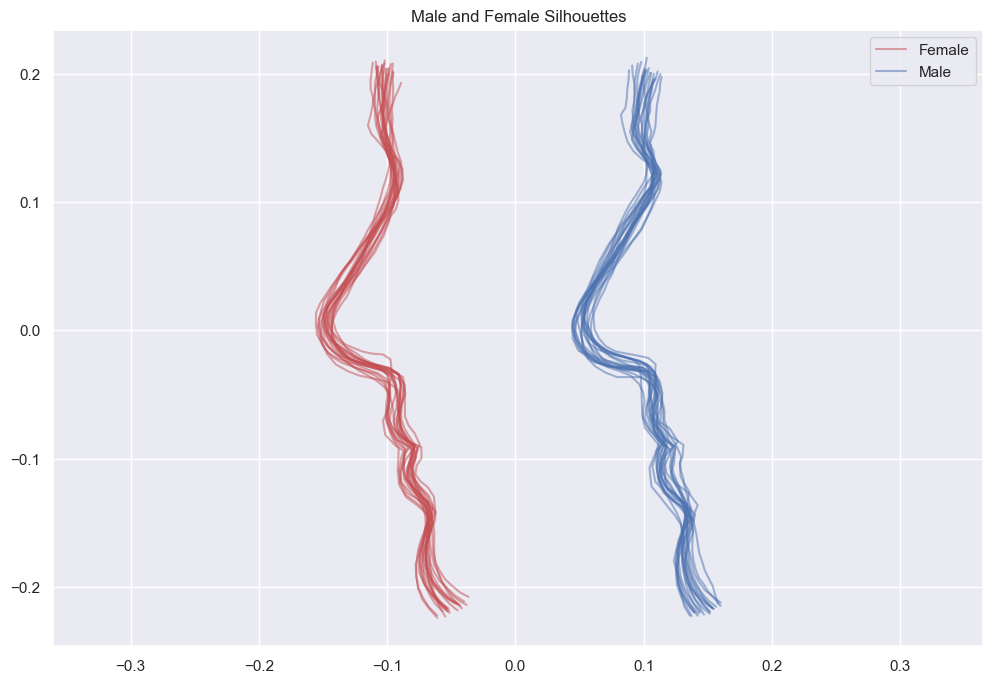

In [7]:
# Create a plot of the female and male silhouettes
# Split Xa into x and y coordinates (first 65 cols are x, last 65 are y)
x_coords = Xa[:, :65]  
y_coords = Xa[:, 65:]

# Create figure and axis
plt.figure(figsize=(12, 8))

# Plot female silhouettes
for i in Fem:
    plt.plot(x_coords[i] - .1, y_coords[i], 'r-', alpha=0.5, label='Female' if i==Fem[0] else "")
    
# Plot male silhouettes  
for i in Male:
    plt.plot(x_coords[i] + .1, y_coords[i], 'b-', alpha=0.5, label='Male' if i==Male[0] else "")

plt.title('Male and Female Silhouettes')
plt.legend()
plt.axis('equal')
plt.show()

>(b) What size of fold would you use for cross-validation for the silhouette data set? Why?

**We have very few observations(39), and ....**

>(c) Select a suitable number K for KNN classification on the silhouette profiles data using leave-one-out cross-validation.

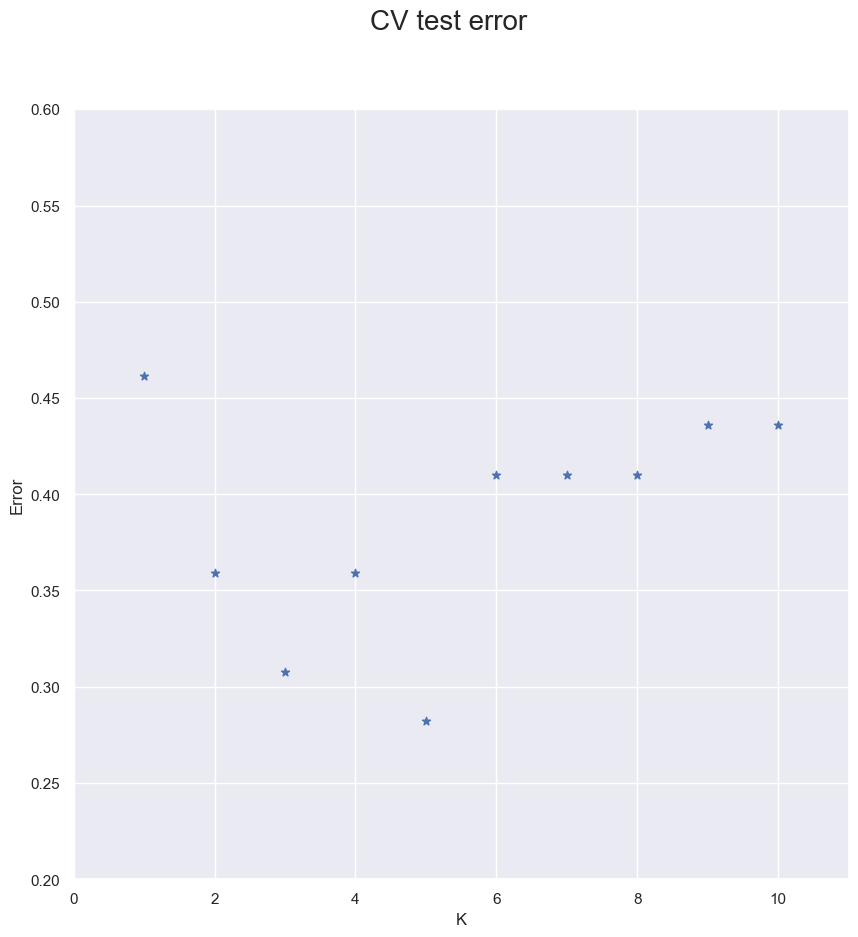

In [10]:
#Setup a response vector
N = np.shape(Xa)[0]
y = np.zeros(N)
y[Fem] = 1
n_classes = 2

# For leave-one-out cross validation, K equals number of samples
K = N

# select a range of k neighbours to try
k_neigh = 10
Error = np.zeros((K, k_neigh))

# Run KNN with different k neighbors using leave-one-out cross validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

# For each k value
for k in range(1, k_neigh + 1):
    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # For each fold in leave-one-out CV
    for fold_idx, (train_idx, test_idx) in enumerate(loo.split(Xa)):
        X_train, X_test = Xa[train_idx], Xa[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Fit and predict
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        
        # Calculate error (0 for correct, 1 for incorrect)
        # Extract single element from y_pred and y_test arrays before comparison
        Error[fold_idx, k - 1] = 1 - float(y_pred[0] == y_test[0])

# Calculate mean error across folds for each k
E = np.mean(Error, axis=0)

# Plot the error for each number of neighbours
fig = plt.figure(figsize=(10, 10))
plt.scatter(list(range(1, k_neigh + 1)), E, marker='*')
plt.axis([0, 11, 0.2, 0.6])
fig.suptitle("CV test error", fontsize=20)
plt.xlabel("K")
plt.ylabel("Error")
plt.show()